# WMT figs of $G^{NC}_\Omega(\theta)$

In [1]:
import xarray as xr
import json
import gcsfs
import cmocean
import matplotlib.pyplot as plt

In [11]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

era = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_updated.zarr'))
sst_clim = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_sst-clim.zarr'))
flx_clim = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_flx-clim.zarr'))
sst_flx_clim = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_sst_flx-clim.zarr'))

In [3]:
era

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

In [4]:
sst_clim

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

In [5]:
flx_clim

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

In [14]:
#doesn't have time dim bc theta nor fluxes vary in time
sst_flx_clim

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 366, theta_bin: 179)
Coordinates:
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>

# 2010 - 2023 pcolor plots

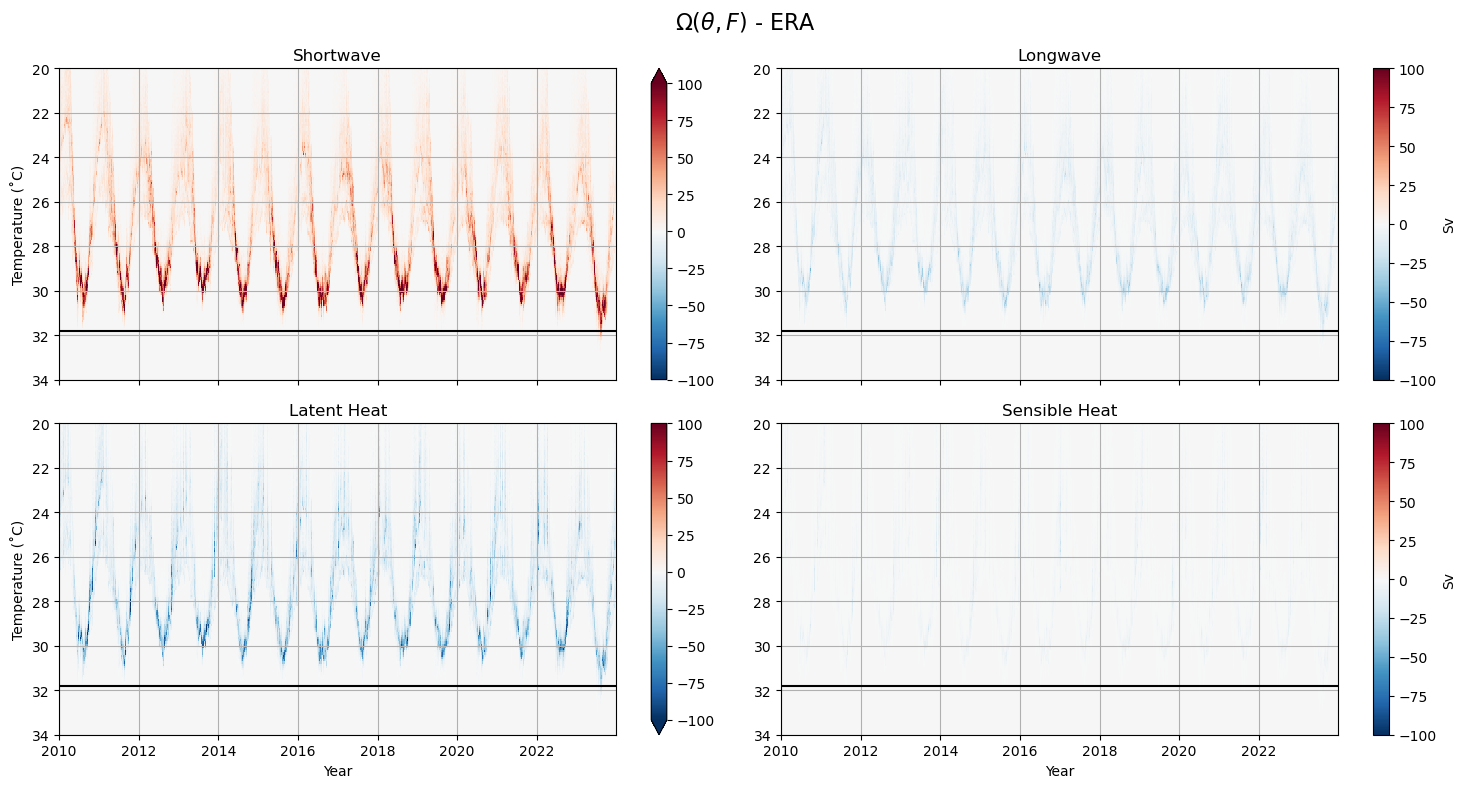

In [6]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)
(era.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(era.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(era.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(era.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\theta, F)$ - ERA", fontsize=16)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor.pdf', transparent=True);

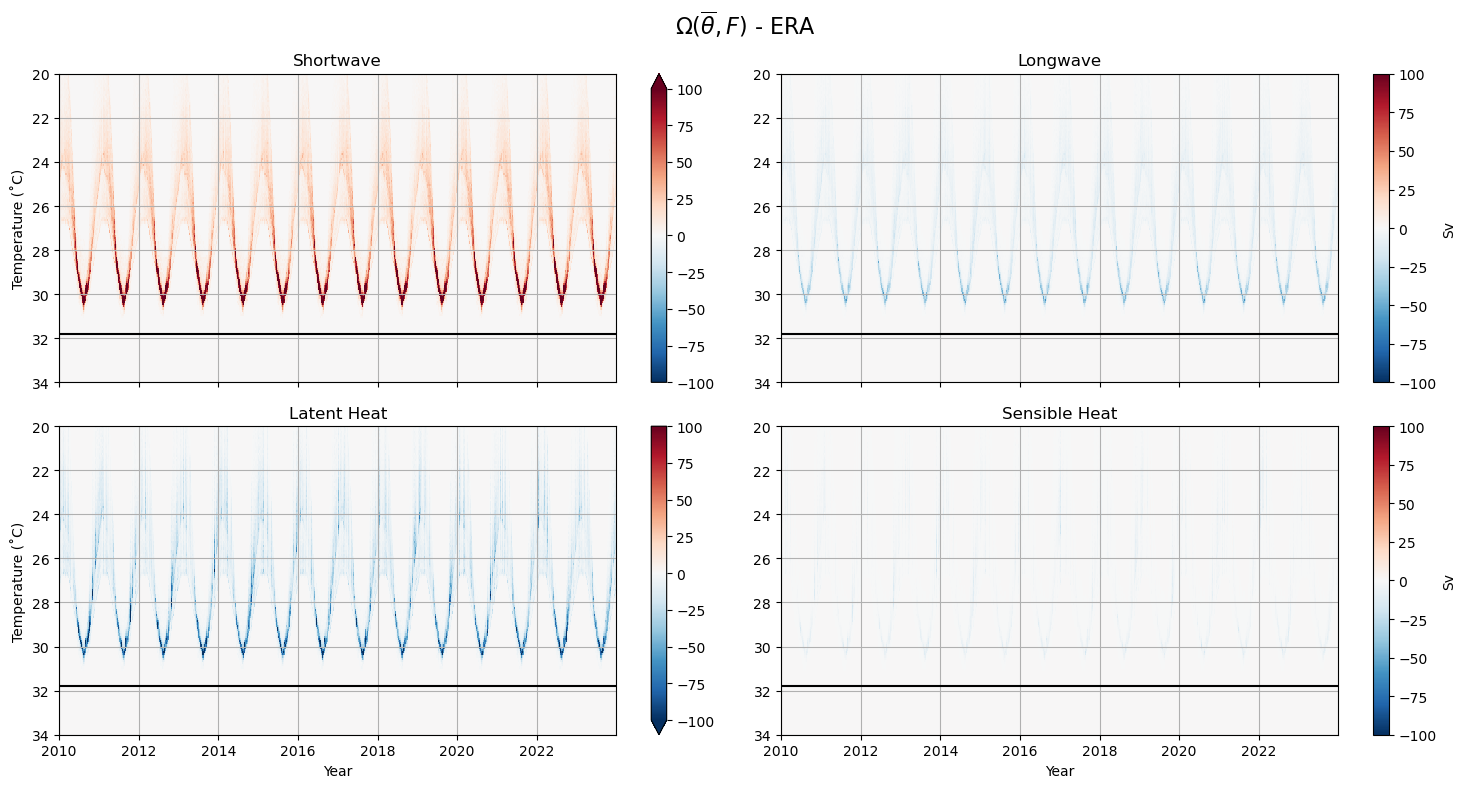

In [7]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)
(sst_clim.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(sst_clim.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(sst_clim.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(sst_clim.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\overline{\theta}, F)$ - ERA", fontsize=16)
plt.tight_layout()
#plt.savefig('paper-figs/era/pcolor-sst_clim.pdf', transparent=True);

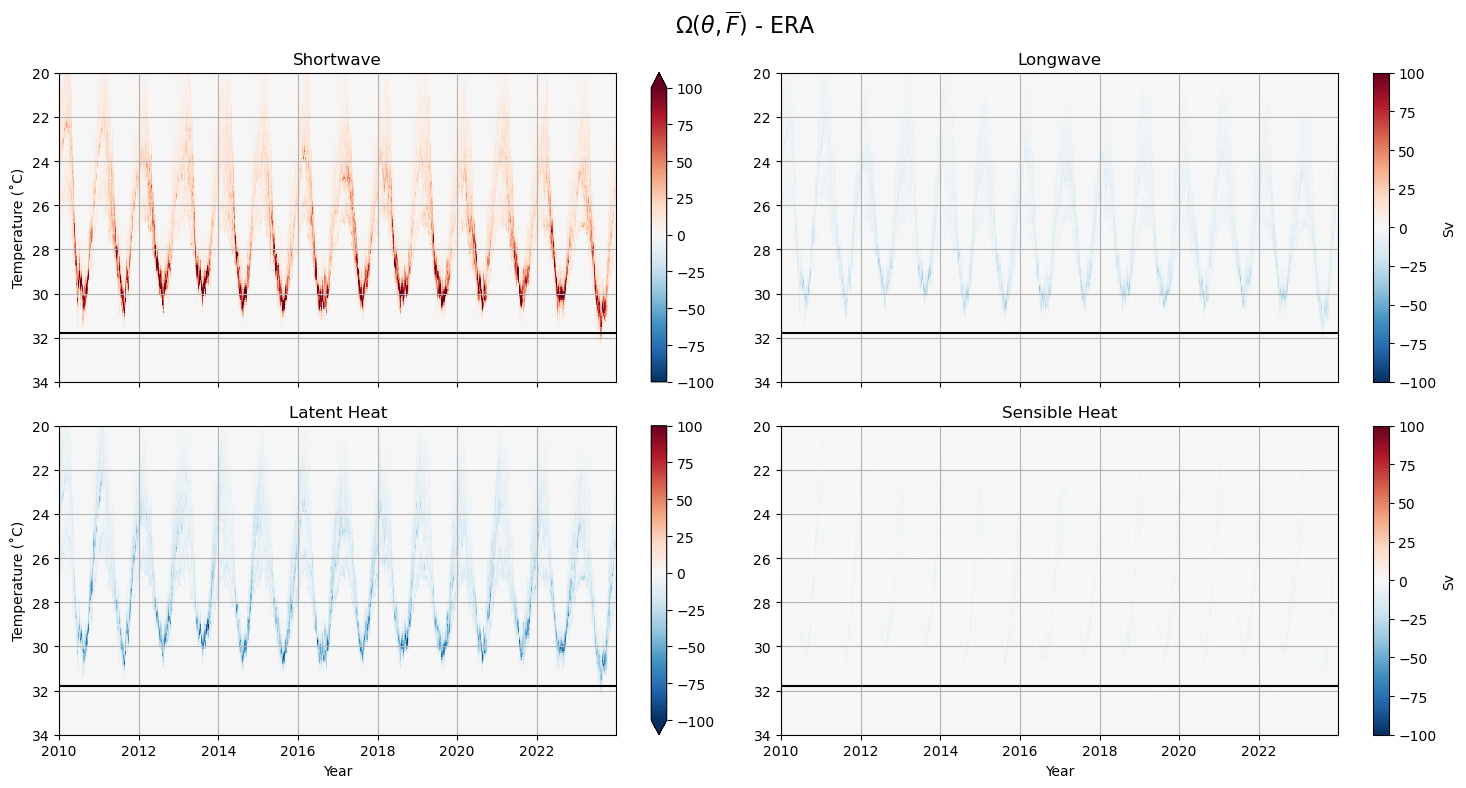

In [8]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)
(flx_clim.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(flx_clim.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(flx_clim.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(flx_clim.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\theta, \overline{F})$ - ERA", fontsize=16)
plt.tight_layout()
#plt.savefig('paper-figs/era/pcolor-flx_clim.pdf', transparent=True);

# 2023 pcolor plots

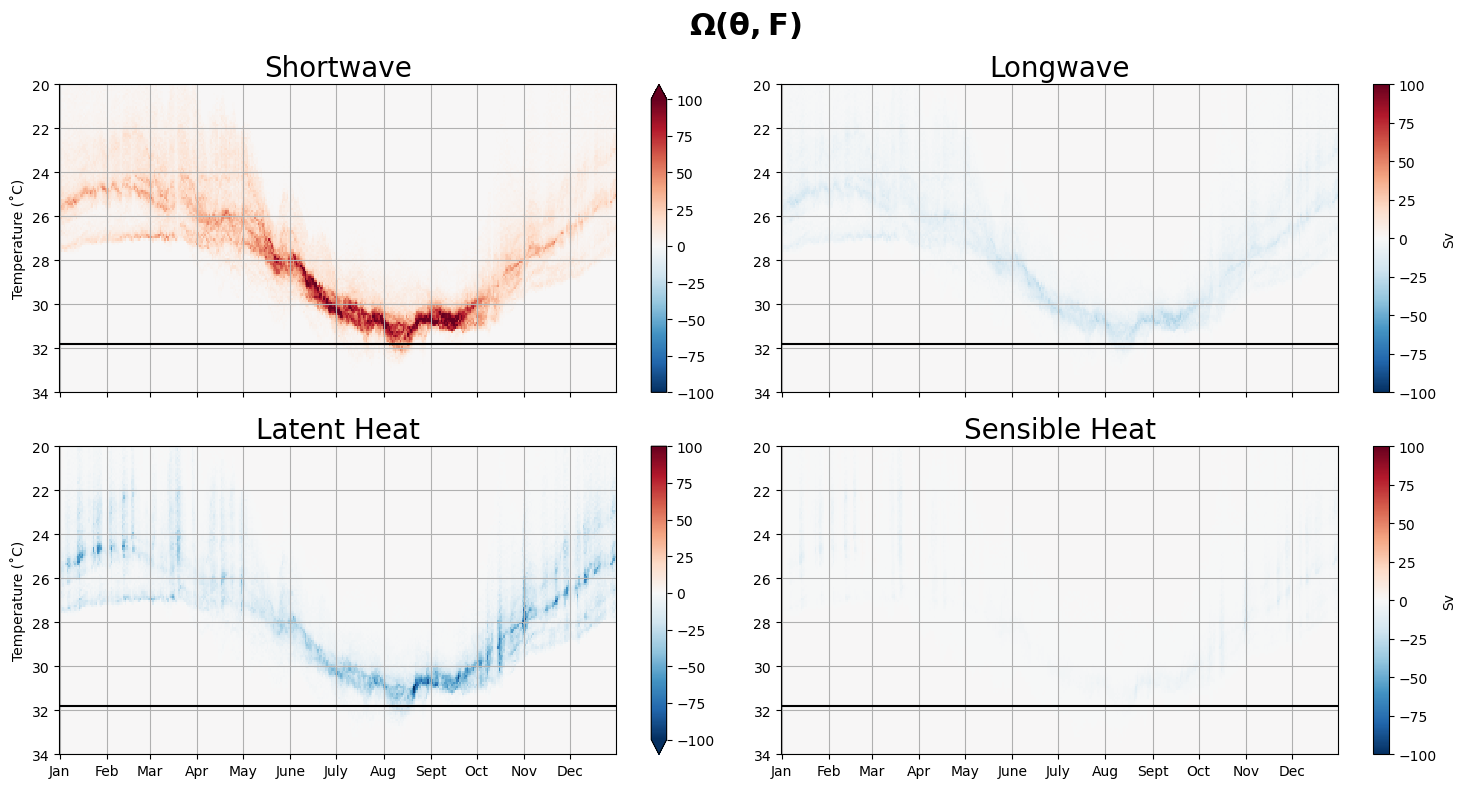

In [7]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

year = dict(time=slice('2023', '2023'))
T = [sst_clim.sel(**year).time[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]

(era.omega_ssr/1e6).sel(**year).T.plot(label='SW', ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(era.omega_str/1e6).sel(**year).T.plot(label='LW', ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(era.omega_slhf/1e6).sel(**year).T.plot(label='LH', ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat', fontsize=20)
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(era.omega_sshf/1e6).sel(**year).T.plot(label='SH', ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat', fontsize=20)
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\mathbf{\Omega(\theta, F)}$", fontsize=22)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-2023.pdf', transparent=True);

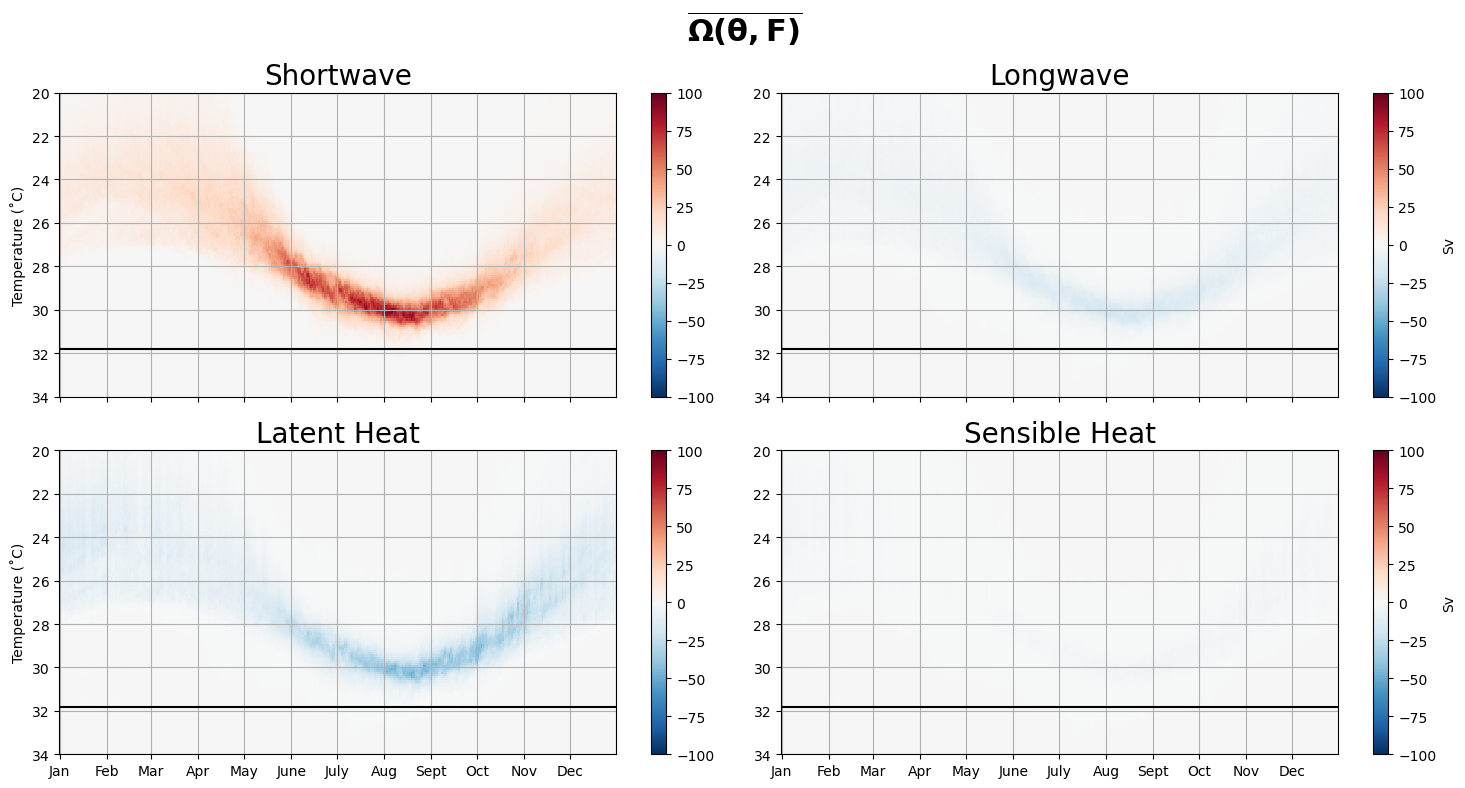

In [8]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

era_clim = era.groupby('time.dayofyear').mean('time')
#+1 bc climatology includes the leap years so dayofyear output==366 not 365
T = [era_clim.dayofyear[i].values for i in [0, 31, 59+1, 90+1, 120+1, 151+1, 181+1, 212+1, 243+1, 273+1, 304+1, 334+1,]]

(era_clim.omega_ssr/1e6).T.plot(label='SW', ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(era_clim.omega_str/1e6).T.plot(label='LW', ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(era_clim.omega_slhf/1e6).T.plot(label='LH', ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat', fontsize=20)
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(era_clim.omega_sshf/1e6).T.plot(label='SH', ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat', fontsize=20)
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\mathbf{\overline{\Omega(\theta, F)}}$", fontsize=22)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-clim-2023.pdf', transparent=True);

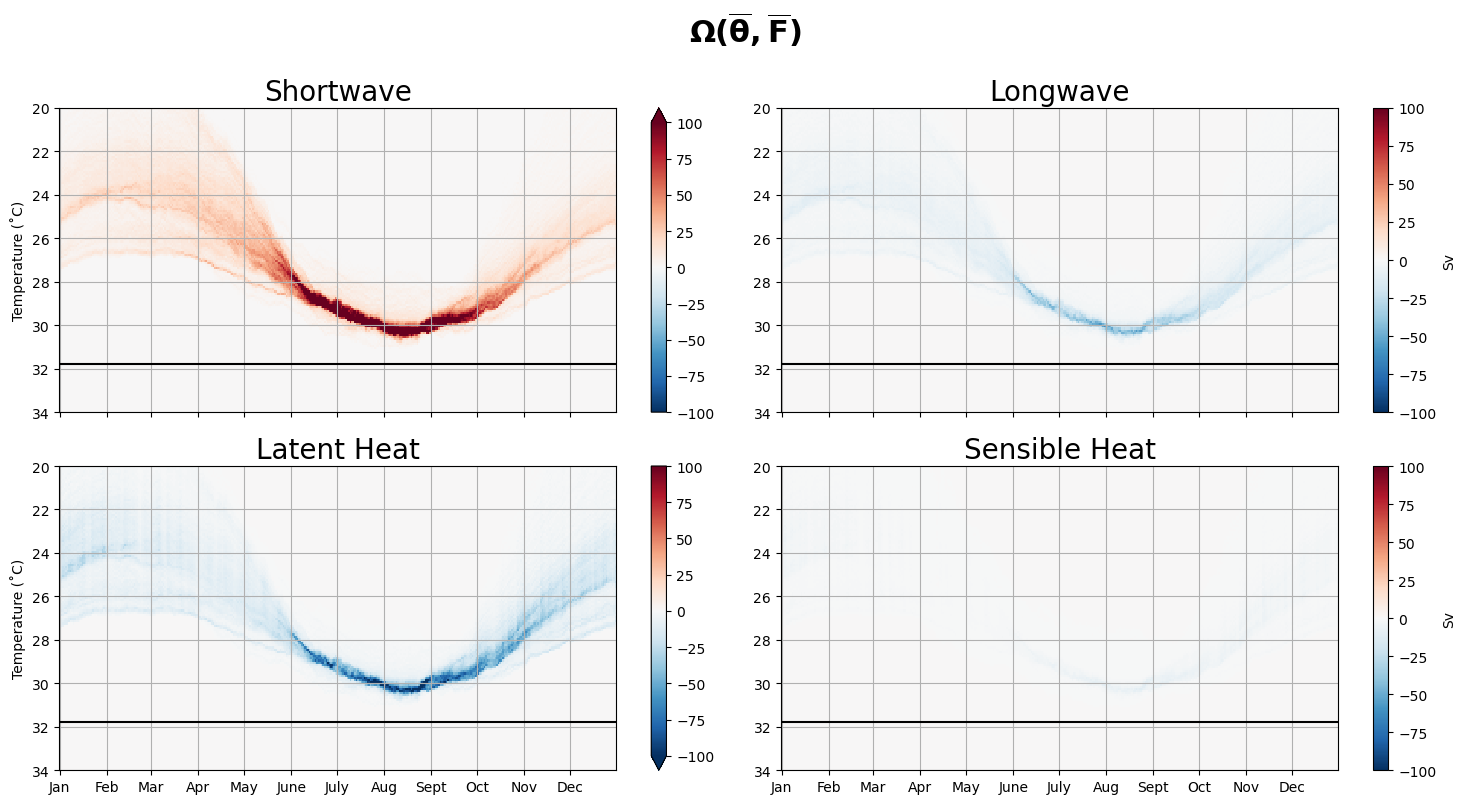

In [17]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

#T = [sst_flx_clim.dayofyear[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]
T = [sst_flx_clim.dayofyear[i].values for i in [0, 31, 59+1, 90+1, 120+1, 151+1, 181+1, 212+1, 243+1, 273+1, 304+1, 334+1,]]

(sst_flx_clim.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(sst_flx_clim.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(sst_flx_clim.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat', fontsize=20)
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(sst_flx_clim.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat', fontsize=20)
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\mathbf{\Omega(\overline{\theta}, \overline{F})}$", 
             y=1, fontsize=22, weight='bold')
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-sst_flx_clim.pdf', transparent=True);

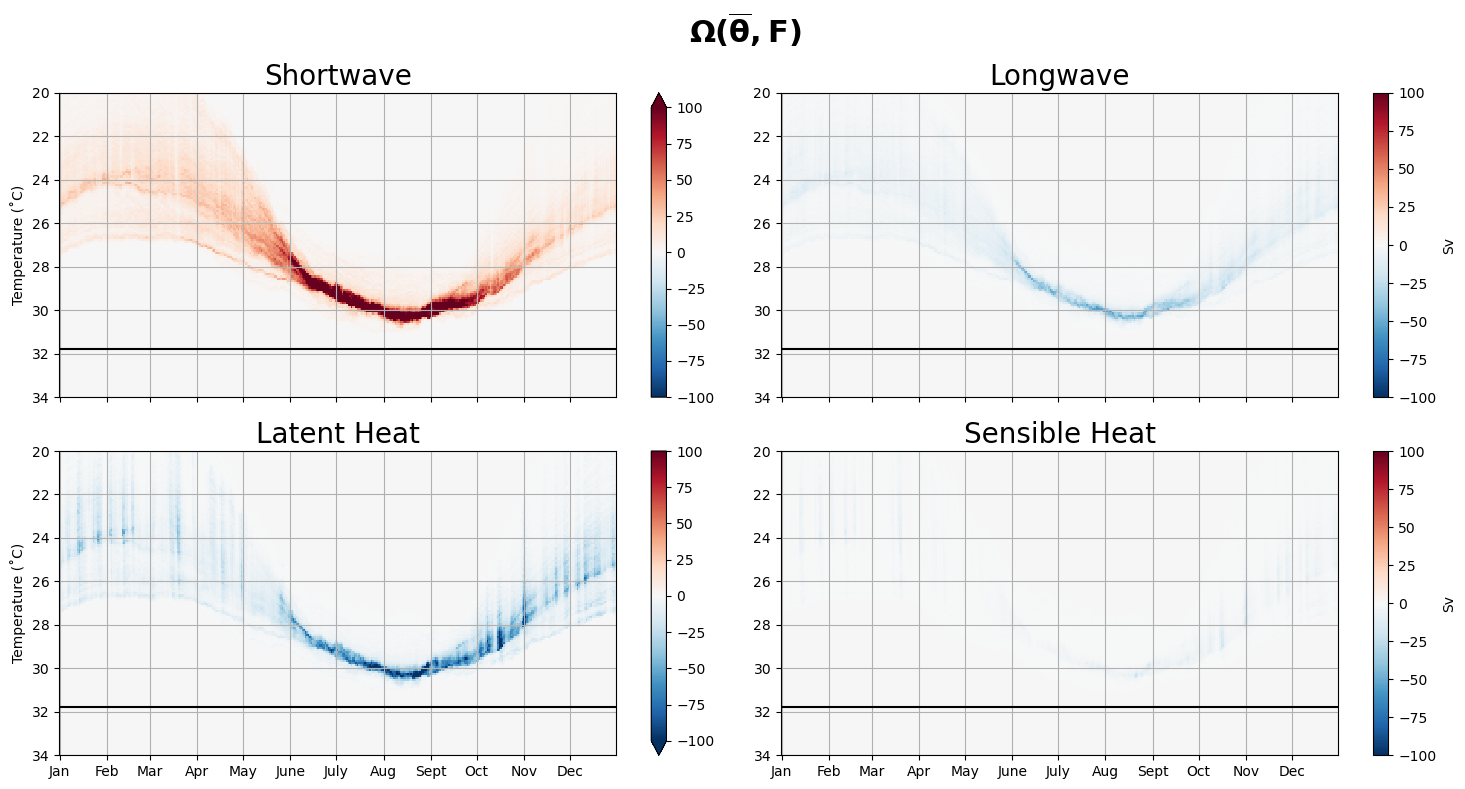

In [9]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

year = dict(time=slice('2023', '2023'))
T = [sst_clim.sel(**year).time[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]

(sst_clim.omega_ssr/1e6).sel(**year).T.plot(label='SW', ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(sst_clim.omega_str/1e6).sel(**year).T.plot(label='LW', ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(sst_clim.omega_slhf/1e6).sel(**year).T.plot(label='LH', ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat', fontsize=20)
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(sst_clim.omega_sshf/1e6).sel(**year).T.plot(label='SH', ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat', fontsize=20)
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\mathbf{\Omega(\overline{\theta}, F)}$", fontsize=22)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-sst_clim-2023.pdf', transparent=True);

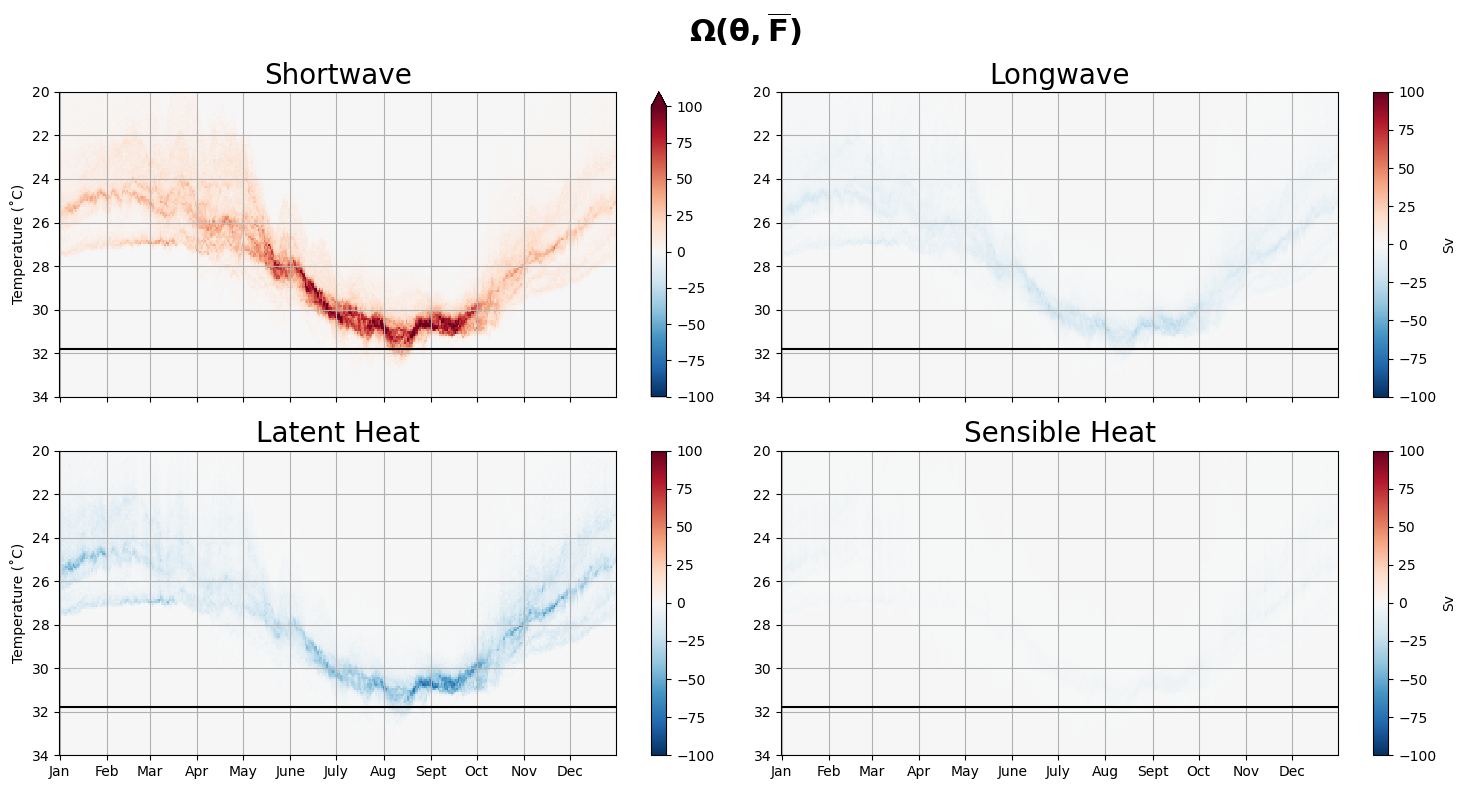

In [10]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

year = dict(time=slice('2023', '2023'))
T = [flx_clim.sel(**year).time[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]

(flx_clim.omega_ssr/1e6).sel(**year).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(flx_clim.omega_str/1e6).sel(**year).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(flx_clim.omega_slhf/1e6).sel(**year).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat', fontsize=20)
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(flx_clim.omega_sshf/1e6).sel(**year).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat', fontsize=20)
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\mathbf{\Omega(\theta, \overline{F})}$", fontsize=22)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-flx_clim-2023.pdf', transparent=True);

## Plot $\Omega(\overline{\theta}, \overline{F}) - \Omega(\overline{\theta}, F)$

In [20]:
sst_flx_clim

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 366, theta_bin: 179)
Coordinates:
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>

In [52]:
sst_clim

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

In [53]:
year = dict(time=slice('2023', '2023'))
sst_tsliced = sst_clim.sel(**year)
sst_clim_new_coord = sst_tsliced.swap_dims({'time':'dayofyear'}).assign_coords({'dayofyear':
                                                                                sst_flx_clim.dayofyear[:-1]}).drop_vars('time')
sst_flx_clim_new = sst_flx_clim.isel(dayofyear=slice(None, -1))

In [54]:
sst_flx_clim_new

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 365, theta_bin: 179)
Coordinates:
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 179), meta=np.ndarray>

In [55]:
sst_clim_new_coord

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 365, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(365, 45), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(365, 45), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(365, 45), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(365, 45), meta=np.ndarray>

In [57]:
sst_clim_diff = (sst_flx_clim_new - sst_clim_new_coord)

In [58]:
sst_clim_diff

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 365, theta_bin: 179)
Coordinates:
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 45), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 45), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 45), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 45), meta=np.ndarray>

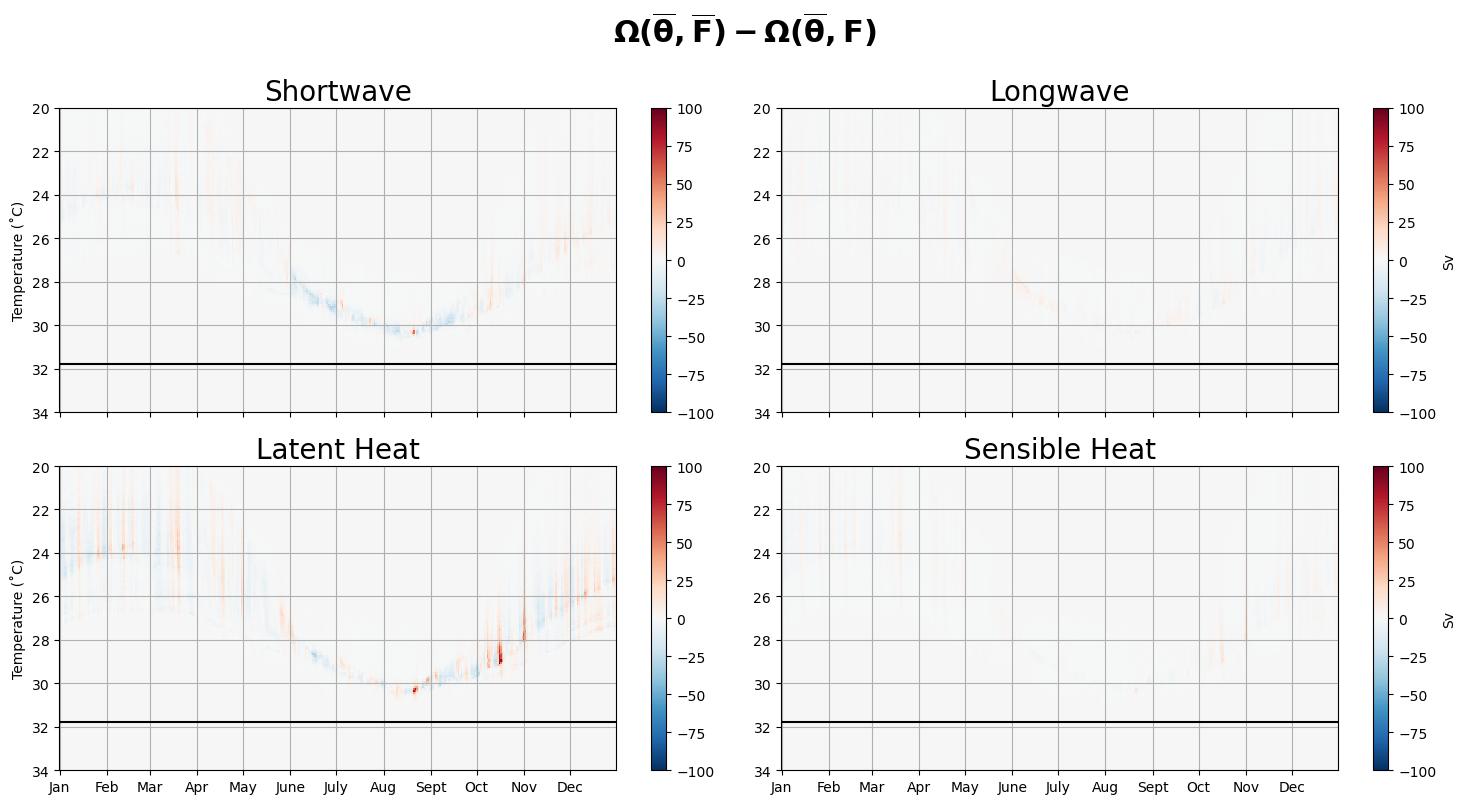

In [61]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

T = [sst_flx_clim.dayofyear[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]

(sst_clim_diff.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(sst_clim_diff.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(sst_clim_diff.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat', fontsize=20)
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(sst_clim_diff.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat', fontsize=20)
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\mathbf{\Omega(\overline{\theta}, \overline{F}) - \Omega(\overline{\theta}, F)}$", 
             y=1, fontsize=22, weight='bold')
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-sst_flx_clim-diff-sst_clim.pdf', transparent=True);

## Plot $\Omega(\overline{\theta}, \overline{F}) - \Omega(\theta, \overline{F})$

In [20]:
sst_flx_clim

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 366, theta_bin: 179)
Coordinates:
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 524kB dask.array<chunksize=(183, 179), meta=np.ndarray>

In [51]:
flx_clim

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

In [41]:
year = dict(time=slice('2023', '2023'))
flx_tsliced = flx_clim.sel(**year)
flx_clim_new_coord = flx_tsliced.swap_dims({'time':'dayofyear'}).assign_coords({'dayofyear':
                                                                                sst_flx_clim.dayofyear[:-1]}).drop_vars('time')
sst_flx_clim_new = sst_flx_clim.isel(dayofyear=slice(None, -1))

In [42]:
sst_flx_clim_new

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 365, theta_bin: 179)
Coordinates:
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 179), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 179), meta=np.ndarray>

In [43]:
flx_clim_new_coord

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 365, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(365, 45), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(365, 45), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(365, 45), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(365, 45), meta=np.ndarray>

In [59]:
flx_clim_diff = (sst_flx_clim_new - flx_clim_new_coord)

In [60]:
flx_clim_diff

<xarray.Dataset> Size: 2MB
Dimensions:     (dayofyear: 365, theta_bin: 179)
Coordinates:
  * dayofyear   (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 360 361 362 363 364 365
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
Data variables:
    omega_slhf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 45), meta=np.ndarray>
    omega_sshf  (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 45), meta=np.ndarray>
    omega_ssr   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 45), meta=np.ndarray>
    omega_str   (dayofyear, theta_bin) float64 523kB dask.array<chunksize=(183, 45), meta=np.ndarray>

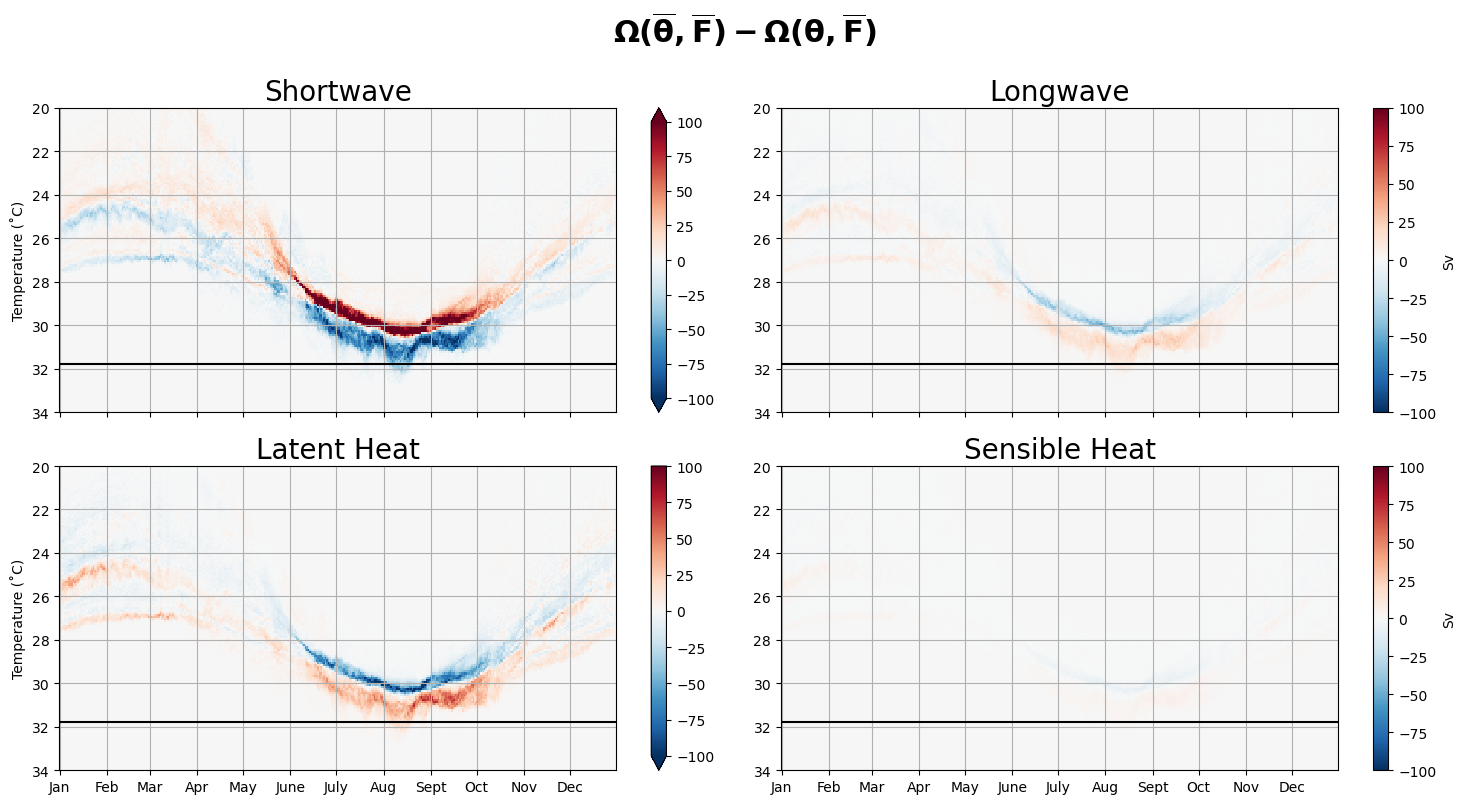

In [50]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

T = [sst_flx_clim.dayofyear[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]
#T = [sst_flx_clim.dayofyear[i].values for i in [0, 31, 59+1, 90+1, 120+1, 151+1, 181+1, 212+1, 243+1, 273+1, 304+1, 334+1,]]

(flx_clim_diff.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave', fontsize=20)
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(flx_clim_diff.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave', fontsize=20)
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(flx_clim_diff.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat', fontsize=20)
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(flx_clim_diff.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat', fontsize=20)
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\mathbf{\Omega(\overline{\theta}, \overline{F}) - \Omega(\theta, \overline{F})}$", 
             y=1, fontsize=22, weight='bold')
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-sst_flx_clim-diff-flx_clim.pdf', transparent=True);

## Select 31.8 bin

In [12]:
import json
import gcsfs
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

glorys = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOPAF/datasets/dVdt.zarr'))
dVdt_da = glorys.histogram_theta

In [14]:
dVdt_da.time

<xarray.DataArray 'time' (time: 303)> Size: 2kB
array(['2023-01-02T12:00:00.000000000', '2023-01-03T12:00:00.000000000',
       '2023-01-04T12:00:00.000000000', ..., '2023-10-29T12:00:00.000000000',
       '2023-10-30T12:00:00.000000000', '2023-10-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02T12:00:00 ... 2023-10-31T12:...
Attributes:
    _ChunkSizes:          1024
    _CoordinateAxisType:  Time
    axis:                 T
    long_name:            Time (hours since 1950-01-01)
    standard_name:        time
    valid_max:            640668.0
    valid_min:            639924.0

In [26]:
flx_clim_daily = flx_clim.sel(time=slice('2023-01-02', '2023-10-31')).resample(time='D').mean()
sst_clim_daily = sst_clim.sel(time=slice('2023-01-02', '2023-10-31')).resample(time='D').mean()

In [19]:
flx_clim_daily.time

<xarray.DataArray 'time' (time: 303)> Size: 2kB
array(['2023-01-02T00:00:00.000000000', '2023-01-03T00:00:00.000000000',
       '2023-01-04T00:00:00.000000000', ..., '2023-10-29T00:00:00.000000000',
       '2023-10-30T00:00:00.000000000', '2023-10-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-02 2023-01-03 ... 2023-10-31

In [20]:
dVdt = (dVdt_da/1e6).assign_coords({'time':flx_clim_daily.time})

In [27]:
one_plt = (flx_clim_daily.sel(theta_bin=31.8, method='nearest')/1e6)
one_plt_sst = (sst_clim_daily.sel(theta_bin=31.8, method='nearest')/1e6)

In [22]:
one_plt

<xarray.Dataset> Size: 12kB
Dimensions:     (time: 303)
Coordinates:
    theta_bin   float64 8B 31.75
  * time        (time) datetime64[ns] 2kB 2023-01-02 2023-01-03 ... 2023-10-31
Data variables:
    omega_slhf  (time) float64 2kB dask.array<chunksize=(303,), meta=np.ndarray>
    omega_sshf  (time) float64 2kB dask.array<chunksize=(303,), meta=np.ndarray>
    omega_ssr   (time) float64 2kB dask.array<chunksize=(303,), meta=np.ndarray>
    omega_str   (time) float64 2kB dask.array<chunksize=(303,), meta=np.ndarray>

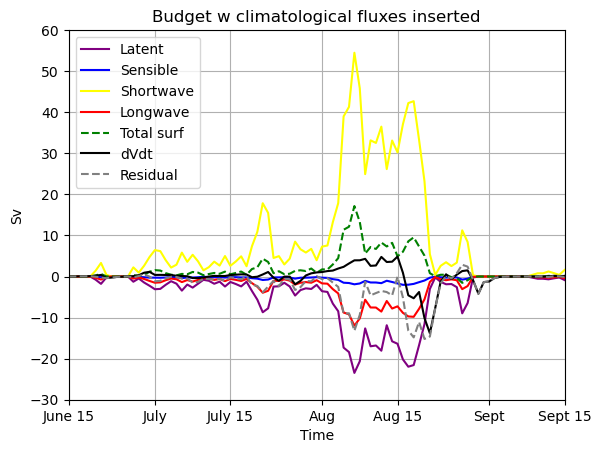

In [25]:
time_slice = dict(time=slice('2023-06-15', '2023-09-15'))
ticks = [dVdt.time[i].values for i in [164, 180, 194, 211, 225, 242, 256]]
tick_labels = ['June 15', 'July', 'July 15', 'Aug', 'Aug 15', 'Sept', 'Sept 15']
ax = plt.axes() 

one_plt.omega_slhf.sel(**time_slice).plot(label='Latent', color='purple')
one_plt.omega_sshf.sel(**time_slice).plot(label='Sensible', color='blue')
one_plt.omega_ssr.sel(**time_slice).plot(label='Shortwave', color='yellow')
one_plt.omega_str.sel(**time_slice).plot(label='Longwave', color='red')
one_plt.to_array().sum('variable').sel(**time_slice).plot(label='Total surf', color='green', linestyle='dashed')
dVdt.sel(**time_slice).plot(label='dVdt', color='k')
(dVdt - one_plt.to_array().sum('variable')).sel(**time_slice).plot(label='Residual', color='grey', linestyle='dashed')
plt.legend(loc='upper left')
plt.ylim(-30, 60)
plt.ylabel('Sv')
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
plt.xlabel('Time')
plt.grid()
t1 = dict(time='2023-06-15', method='nearest')
t2 = dict(time='2023-09-15', method='nearest')
plt.xlim(one_plt.time.sel(**t1), one_plt.time.sel(**t2))
plt.title('Budget w climatological fluxes inserted');
#plt.savefig('paper-figs/era/budget.pdf')
#plt.suptitle('ERA');

In [ ]:
time_slice = dict(time=slice('2023-06-15', '2023-09-15'))
ticks = [dVdt.time[i].values for i in [164, 180, 194, 211, 225, 242, 256]]
tick_labels = ['June 15', 'July', 'July 15', 'Aug', 'Aug 15', 'Sept', 'Sept 15']
ax = plt.axes() 

one_plt_sst.omega_slhf.sel(**time_slice).plot(label='Latent', color='purple')
one_plt_sst.omega_sshf.sel(**time_slice).plot(label='Sensible', color='blue')
one_plt_sst.omega_ssr.sel(**time_slice).plot(label='Shortwave', color='yellow')
one_plt_sst.omega_str.sel(**time_slice).plot(label='Longwave', color='red')
one_plt_sst.to_array().sum('variable').sel(**time_slice).plot(label='Total surf', color='green', linestyle='dashed')
dVdt.sel(**time_slice).plot(label='dVdt', color='k')
(dVdt - one_plt_sst.to_array().sum('variable')).sel(**time_slice).plot(label='Residual', color='grey', linestyle='dashed')
plt.legend(loc='upper left')
plt.ylim(-30, 60)
plt.ylabel('Sv')
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
plt.xlabel('Time')
plt.grid()
t1 = dict(time='2023-06-15', method='nearest')
t2 = dict(time='2023-09-15', method='nearest')
plt.xlim(one_plt_sst.time.sel(**t1), one_plt_sst.time.sel(**t2))
plt.title("Budget w climatological sst's inserted");
#plt.savefig('paper-figs/era/budget.pdf')
#plt.suptitle('ERA');